
#**Poverty Predction**

##Objectives:
Create a model that:  
a. Predict if a household is poor or not  
b. Provide a predictive chance of a household identified as poor.  

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
povpred = pd.read_csv("povpred.csv")

In [ ]:
povpred.columns

Index(['country', 'is_urban', 'age', 'female', 'married', 'religion',
       'relationship_to_hh_head', 'education_level', 'literate', 'can_add',
       'can_divide', 'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'borrowing_recency', 'formal_savings',
       'informal_savings', 'has_insurance', 'has_investment',
       'bank_interest_rate', 'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrowed_for_home_or_biz_last_year', 'can_call_viaphone',
       'can_text_viaphone', 'can_use_internet_viaphone', 'active_bank_user',
       'poverty_probability'],
      dtype='object')

In [ ]:
povpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                12600 non-null  object 
 1   is_urban                               12600 non-null  bool   
 2   age                                    12600 non-null  int64  
 3   female                                 12600 non-null  bool   
 4   married                                12600 non-null  bool   
 5   religion                               12600 non-null  object 
 6   relationship_to_hh_head                12600 non-null  object 
 7   education_level                        12364 non-null  float64
 8   literate                               12600 non-null  bool   
 9   can_add                                12600 non-null  bool   
 10  can_divide                             12600 non-null  bool   
 11  em

In [ ]:
povpred.isnull().sum()

country                                      0
is_urban                                     0
age                                          0
female                                       0
married                                      0
religion                                     0
relationship_to_hh_head                      0
education_level                            236
literate                                     0
can_add                                      0
can_divide                                   0
employed_last_year                           0
employment_category_last_year                0
employment_type_last_year                    0
income_own_business_last_year                0
income_private_sector_last_year              0
income_public_sector_last_year               0
num_times_borrowed_last_year                 0
borrowing_recency                            0
formal_savings                               0
informal_savings                             0
has_insurance

In [ ]:
#Impute
def impute_educ_level(cols):
  educ_level = cols[0]
  literate = cols[1]
  can_divide = cols[2]
  can_add = cols[3]
  if pd.isnull(educ_level):
    # if lahat True
    if (literate == True) and (can_divide == True) and (can_add == True):
      return 1
    else:
      return 0
  return educ_level


In [ ]:
povpred['education_level'] = povpred[['education_level','literate','can_divide', 'can_add']].apply(impute_educ_level, axis=1)

In [ ]:
povpred.isnull().sum()

country                                      0
is_urban                                     0
age                                          0
female                                       0
married                                      0
religion                                     0
relationship_to_hh_head                      0
education_level                              0
literate                                     0
can_add                                      0
can_divide                                   0
employed_last_year                           0
employment_category_last_year                0
employment_type_last_year                    0
income_own_business_last_year                0
income_private_sector_last_year              0
income_public_sector_last_year               0
num_times_borrowed_last_year                 0
borrowing_recency                            0
formal_savings                               0
informal_savings                             0
has_insurance

In [ ]:
povpred.drop(['bank_interest_rate','borrowing_recency'], axis=1, inplace=True)

In [ ]:
povpred.head()

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literate,can_add,...,has_insurance,has_investment,borrowed_for_emergency_last_year,borrowed_for_daily_expenses_last_year,borrowed_for_home_or_biz_last_year,can_call_viaphone,can_text_viaphone,can_use_internet_viaphone,active_bank_user,poverty_probability
0,C,False,18,True,True,P,Other,1.0,True,True,...,False,False,False,False,False,True,True,False,True,0.515
1,C,True,30,True,True,P,Other,1.0,True,True,...,False,False,False,False,False,True,False,False,True,0.981
2,A,False,20,True,True,Q,Spouse,1.0,True,True,...,False,False,False,False,False,True,False,False,False,0.982
3,A,False,61,False,True,Q,Head,0.0,False,True,...,False,False,False,False,False,True,False,False,False,0.879
4,D,False,26,True,True,X,Spouse,1.0,True,False,...,False,False,False,False,False,True,True,False,False,0.796


In [ ]:
povpred.columns

Index(['country', 'is_urban', 'age', 'female', 'married', 'religion',
       'relationship_to_hh_head', 'education_level', 'literate', 'can_add',
       'can_divide', 'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'formal_savings', 'informal_savings',
       'has_insurance', 'has_investment', 'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrowed_for_home_or_biz_last_year', 'can_call_viaphone',
       'can_text_viaphone', 'can_use_internet_viaphone', 'active_bank_user',
       'poverty_probability'],
      dtype='object')

# One hot encode

In [ ]:
povpred.replace({True:1,False:0},inplace=True)

In [ ]:
# categorical variables
cat_var = ['country', 'religion', 'relationship_to_hh_head','employment_category_last_year', 'employment_type_last_year']
povpred = pd.get_dummies(povpred,columns=cat_var)

In [ ]:
povpred.head()

,is_urban,age,female,married,education_level,literate,can_add,can_divide,employed_last_year,income_own_business_last_year,...,employment_category_last_year_employed,employment_category_last_year_housewife_or_student,employment_category_last_year_other,employment_category_last_year_retired_or_disabled,employment_category_last_year_unemployed,employment_type_last_year_irregular_seasonal,employment_type_last_year_not_working,employment_type_last_year_other,employment_type_last_year_salaried,employment_type_last_year_self_employed
0,0,18,1,1,1.0,1,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,30,1,1,1.0,1,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,20,1,1,1.0,1,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
3,0,61,0,1,0.0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,26,1,1,1.0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
povpred.columns

Index(['is_urban', 'age', 'female', 'married', 'education_level', 'literate',
       'can_add', 'can_divide', 'employed_last_year',
       'income_own_business_last_year', 'income_private_sector_last_year',
       'income_public_sector_last_year', 'num_times_borrowed_last_year',
       'formal_savings', 'informal_savings', 'has_insurance', 'has_investment',
       'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrowed_for_home_or_biz_last_year', 'can_call_viaphone',
       'can_text_viaphone', 'can_use_internet_viaphone', 'active_bank_user',
       'poverty_probability', 'country_A', 'country_C', 'country_D',
       'country_F', 'country_G', 'country_I', 'country_J', 'religion_N',
       'religion_O', 'religion_P', 'religion_Q', 'religion_X',
       'relationship_to_hh_head_Father/Mother', 'relationship_to_hh_head_Head',
       'relationship_to_hh_head_Other',
       'relationship_to_hh_head_Sister/Brother',
       'relationship_to_hh_head_

In [ ]:
# 1 hot encode poverty probability
threshold =0.5
povpred['poverty_prediction'] = (povpred['poverty_probability'] > threshold).astype(int)
# def pov_class(pov_prob):
#   if pov_prob  > 0.5:
#     return 1
#   else:
#     return 0

In [ ]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
num_cols = ['age']

# Create scaler object
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(povpred[num_cols])

# Fit scaler on selected columns
scaler.fit(povpred[num_cols])

# Transform selected columns with scaler
povpred[num_cols] = scaler.transform(povpred[num_cols])

In [ ]:
povpred['poverty_prediction']

0        1
1        1
2        1
3        1
4        1
        ..
12595    1
12596    1
12597    0
12598    1
12599    1
Name: poverty_prediction, Length: 12600, dtype: int64

In [ ]:
# povpred['poverty_probability'] = povpred[['poverty_probability']].apply(pov_class, axis=1)

In [ ]:
X = povpred.drop(['poverty_probability', 'poverty_prediction'], axis=1)
y = povpred.poverty_prediction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X

,is_urban,age,female,married,education_level,literate,can_add,can_divide,employed_last_year,income_own_business_last_year,...,employment_category_last_year_employed,employment_category_last_year_housewife_or_student,employment_category_last_year_other,employment_category_last_year_retired_or_disabled,employment_category_last_year_unemployed,employment_type_last_year_irregular_seasonal,employment_type_last_year_not_working,employment_type_last_year_other,employment_type_last_year_salaried,employment_type_last_year_self_employed
0,0,0.03,1,1,1.0,1,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0.15,1,1,1.0,1,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0.05,1,1,1.0,1,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0.46,0,1,0.0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.11,1,1,1.0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,1,0.35,0,1,1.0,1,1,1,1,0,...,1,0,0,0,0,0,0,0,1,0
12596,0,0.75,0,0,0.0,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
12597,0,0.37,1,0,1.0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
12598,0,0.25,0,1,0.0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
# povpred= povpred.astype(int)


In [ ]:
logistic_model = LogisticRegression()

In [ ]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = logistic_model.predict(X_test)
predictions

array([1, 0, 1, ..., 1, 1, 1])

# Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

In [ ]:
print(accuracy_score(y_test,predictions))

0.7507936507936508


In [ ]:
povpred.poverty_prediction.value_counts()

1    8117
0    4483
Name: poverty_prediction, dtype: int64

In [ ]:
cm = confusion_matrix(y_test,predictions)
print(cm)

[[ 744  597]
 [ 340 2099]]


In [ ]:
sklearn.metrics.precision_score(y_test, predictions)

0.7785608308605341

In [ ]:
sklearn.metrics.recall_score(y_test, predictions)

0.8605986059860599

In [ ]:
sklearn.metrics.recall_score(y_test, predictions, pos_label =0)

0.5548098434004475

In [ ]:
sklearn.metrics.f1_score(y_test, predictions)

0.8175267770204478

In [ ]:
print('classification report:')
print(classification_report(y_test, predictions))

classification report:
              precision    recall  f1-score   support

           0       0.68      0.56      0.62      1339
           1       0.78      0.85      0.82      2441

    accuracy                           0.75      3780
   macro avg       0.73      0.71      0.72      3780
weighted avg       0.74      0.75      0.74      3780



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:,1])
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         ... 0.99254288 0.99254288 1.        ]
[0.00000000e+00 4.10004100e-04 1.51701517e-02 ... 9.99589996e-01
 1.00000000e+00 1.00000000e+00]
[1.9911385  0.9911385  0.97970488 ... 0.05264061 0.05132345 0.02965202]


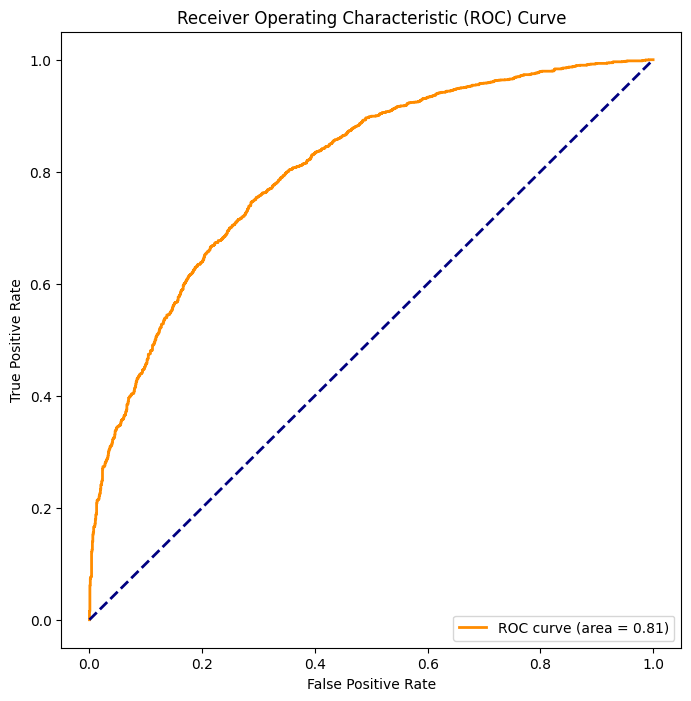

In [ ]:
# Plot ROC curve
import matplotlib.pyplot as plt

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Feature of Importance

# Feature of Importance

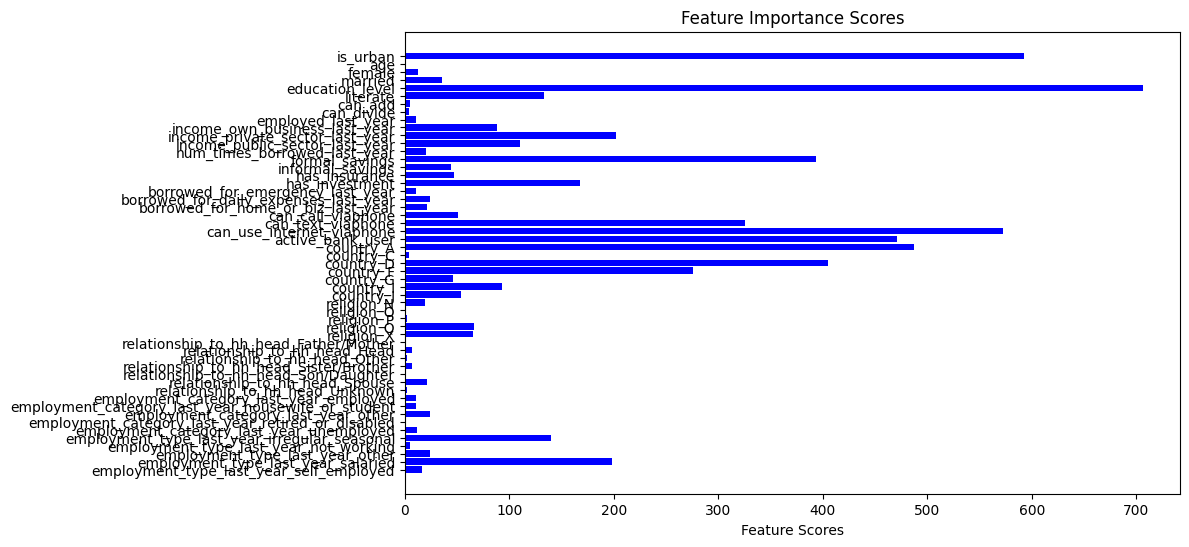

Features in Order of Importance:
education_level: 706.370485232942
is_urban: 592.8100196479479
can_use_internet_viaphone: 572.712745102396
country_A: 486.901223240824
active_bank_user: 470.9341069839676
country_D: 404.4111457881879
formal_savings: 393.15115719653977
can_text_viaphone: 325.3632640770821
country_F: 276.12359817211143
income_private_sector_last_year: 201.5527686277871
employment_type_last_year_salaried: 198.53158707153477
has_investment: 167.56064936698556
employment_type_last_year_irregular_seasonal: 140.21631392638332
literate: 132.9788257754318
income_public_sector_last_year: 109.66314862762154
country_I: 92.7828352283467
income_own_business_last_year: 88.30186534797525
religion_Q: 66.09331314065584
religion_X: 64.74140670685316
country_J: 53.45758639506482
can_call_viaphone: 50.317485934274174
has_insurance: 46.85043513589217
country_G: 45.89342905641545
informal_savings: 44.43931696322561
married: 35.68807589739603
employment_category_last_year_other: 24.095737417027

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

# Here, we select the top 2 features based on chi-squared statistical test
select_k_best = SelectKBest(chi2, k=2)
X_new = select_k_best.fit_transform(X, y)

# Get the feature scores
feature_scores = select_k_best.scores_
feature_names = X.columns

# Create a bar plot to visualize the feature scores
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_scores, color='b', align='center')
plt.xlabel('Feature Scores')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

plt.show()

# Get the feature scores
feature_scores = select_k_best.scores_

# Create a dictionary to map feature names to their scores
feature_scores_dict = {feature_name: score for feature_name, score in zip(X.columns, feature_scores)}

# Sort features by their scores in descending order
sorted_features = sorted(feature_scores_dict, key=feature_scores_dict.get, reverse=True)

# Print the features in order of importance
print("Features in Order of Importance:")
for feature in sorted_features:
    print(f"{feature}: {feature_scores_dict[feature]}")


In [ ]:
important_features = ['education_level','is_urban','can_use_internet_viaphone','country_A', 'country_D', 'country_F', 'active_bank_user','formal_savings', 'can_text_viaphone', 'income_private_sector_last_year']
# important_features = ['education_level','is_urban','can_use_internet_viaphone','active_bank_user','formal_savings', 'can_text_viaphone', 'income_private_sector_last_year', 'employment_type_last_year_salaried', 'has_investment']

In [ ]:
X = povpred[important_features]
y = povpred.poverty_prediction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X

,education_level,is_urban,can_use_internet_viaphone,country_A,country_D,country_F,active_bank_user,formal_savings,can_text_viaphone,income_private_sector_last_year
0,1.0,0,0,0,0,0,1,0,1,0
1,1.0,1,0,0,0,0,1,0,0,0
2,1.0,0,0,1,0,0,0,0,0,0
3,0.0,0,0,1,0,0,0,0,0,0
4,1.0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
12595,1.0,1,0,0,0,0,0,0,0,0
12596,0.0,0,0,0,1,0,0,0,0,0
12597,1.0,0,0,0,0,0,0,0,0,0
12598,0.0,0,1,0,0,0,0,0,1,0


In [ ]:
logistic_model = LogisticRegression()

In [ ]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = logistic_model.predict(X_test)
predictions

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
print(accuracy_score(y_test,predictions))

0.7444444444444445


In [ ]:
important_features = ['education_level','is_urban','can_use_internet_viaphone','country_A', 'country_D', 'country_F', 'active_bank_user','formal_savings', 'can_text_viaphone', 'income_private_sector_last_year', 'employment_type_last_year_salaried', 'has_investment', 'employment_type_last_year_irregular_seasonal', 'literate', 'income_public_sector_last_year']
